# **Hands-On Machine Learning Project**
## **Topic 20: Credit Data**
### Florian Korn, Vincent Bläske, Dennis Götz

***
# **Table of Content**
**[I.&nbsp; Data Load](#get)**<br>
**[II. Problem Description and Big Picture](#frame)**<br>
**[III.Data Exploration](#feature_overview)**<br>
***

## **I. Data Load** <a id='get_data'></a>
**[1. Download the Data](#down)**<br>
**[2. Convert the Data](#convert)**<br>
**[3. Encoding](#encode)**<br>
**[4. Sample a Test Set](#test)**<br>
***
### **Import of librariers:**

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import scipy.stats as stats

***
### **1. Download the Data** <a id='down'></a> <br> 
All attributes of the data set and load of original data set.

In [2]:
attributes = ['Status of existing checking account',
              'Duration in month',
              'Credit history',
              'Purpose',
              'Credit amount', 
              'Savings account/bonds',
              'Present employment since',
              'Installment rate in percentage of disposable income', 
              'Personal status and sex',
              'Other debtors / guarantors',
              'Present residence since',
              'Property',
              'Age in years',
              'Other installment plans',
              'Housing',
              'Number of existing credits at this bank',
              'Job',
              'Number of people being liable to provide maintenance for',
              'Telephone',
              'foreign worker',
              'Credit rating']

data = pd.read_csv('german.data', sep=' ', header=None)
data.columns = attributes

data.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Description of the data columns:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

Here a dictionary with real values for the DataFrame is generated. The "real meanings" of the codes are taken from the description of the data set (see [here](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data)).

In [4]:
cat_dict = {# Attribute 1: (qualitative) Status of existing checking account 
                    'A11' : '... < 0 DM',
                    'A12' : '0 <= ... < 200 DM',
                    'A13' : '... >= 200 DM / salary assignments for at least 1 year',
                    'A14' : 'no checking account',

                    # Attribute 3: (qualitative) Credit history 
                    'A30' : 'no credits taken/ all credits paid back duly',
                    'A31' : 'all credits at this bank paid back duly',
                    'A32' : 'existing credits paid back duly till now',
                    'A33' : 'delay in paying off in the past',
                    'A34' : 'critical account/ other credits existing (not at this bank)',
                    
                    # Attribute 4: (qualitative) Purpose 
                    'A40' : 'car (new)',
                    'A41' : 'car (used)',
                    'A42' : 'furniture/equipment',
                    'A43' : 'radio/television',
                    'A44' : 'domestic appliances',
                    'A45' : 'repairs',
                    'A46' : 'education',
                    'A47' : '(vacation - does not exist?)',
                    'A48' : 'retraining',
                    'A49' : 'business',
                    'A410' : 'others',

                    # Attibute 6: (qualitative) Savings account/bonds 
                    'A61' : '... < 100 DM',
                    'A62' : '100 <= ... < 500 DM',
                    'A63' : '500 <= ... < 1000 DM',
                    'A64' : '... >= 1000 DM',
                    'A65' : 'unknown/ no savings account',

                    # Attribute 7: (qualitative) Present employment since 
                    'A71' : 'unemployed',
                    'A72' : '... < 1 year',
                    'A73' : '1 <= ... < 4 years',
                    'A74' : '4 <= ... < 7 years',
                    'A75' : '... >= 7 years',

                    # Attribute 9: (qualitative) Personal status and sex 
                    'A91' : 'male : divorced/separated',
                    'A92' : 'female : divorced/separated/married',
                    'A93' : 'male : single',
                    'A94' : 'male : married/widowed',
                    'A95' : 'female : single',

                    # Attribute 10: (qualitative) Other debtors / guarantors 
                    'A101' : 'none',
                    'A102' : 'co-applicant',
                    'A103' : 'guarantor',

                    # Attribute 12: (qualitative) Property 
                    'A121' : 'real estate',
                    'A122' : 'building society savings agreement/ life insurance',
                    'A123' : 'car or other, not in attribute 6',
                    'A124' : 'unknown / no property',

                    # Attribute 14: (qualitative) Other installment plans 
                    'A141' : 'bank',
                    'A142' : 'stores',
                    'A143' : 'none',

                    # Attribute 15: (qualitative) Housing 
                    'A151' : 'rent',
                    'A152' : 'own',
                    'A153' : 'for free',

                    # Attribute 17: (qualitative) Job
                    'A171' : 'unemployed/ unskilled - non-resident',
                    'A172' : 'unskilled - resident',
                    'A173' : 'skilled employee / official',
                    'A174' : 'management/ self-employed/ highly qualified employee/ officer',

                    # Attribute 19: (qualitative) Telephone
                    'A191' : 'none',
                    'A192' : 'yes, registered under the customers name',

                    # Attribute 20: (qualitative) foreign worker 
                    'A201' : 'yes',
                    'A202' : 'no',

                    # Target value: (qualitative) Credit rating
                    1 : 'good',
                    2 : 'bad'
                    }

**[Back to I. Data Load](#get_data)**<br>

### **2. Convert the Data** <a id='convert'></a><br>

Below, categorical attributes and their codes are transformed with their real meaning from previous dictionary.

In [5]:
# Qualitative attributes
cat_attribs = ['Status of existing checking account',
               'Credit history',
               'Purpose',
               'Savings account/bonds', 
               'Present employment since',
               'Personal status and sex',
               'Other debtors / guarantors',
               'Property',
               'Other installment plans',
               'Housing',
               'Job',
               'Telephone',
               'foreign worker',
               'Credit rating']

# Numerical attributes
num_attribs = list(set(attributes) - set(cat_attribs))

# Copy the data to a new DataFrame
data_values = data.copy()

# Apply the dictionary to all categorical attributes of the new DataFrame to get the real values
data_values[cat_attribs] = pd.DataFrame([data_values[attribute].apply(lambda key: cat_dict[key]) for attribute in cat_attribs]).T

# Save new DataFrame as XLSX
# data_values.to_excel('data_values.xlsx')

data_values.head(3)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,good


**[Back to I. Data Load](#get_data)**<br>

### **3. Encoding**<a id='encode'></a>
Another Dictionary is created, which is used for ordering the ordinal encoding.

In [6]:
# Dictionary with mapped ordinal attributes
dict_ordinal_map = {'Status of existing checking account' : ['no checking account', 
                                                             '... < 0 DM', 
                                                             '0 <= ... < 200 DM', 
                                                             '... >= 200 DM / salary assignments for at least 1 year'],
                    'Credit history' : ['no credits taken/ all credits paid back duly', 
                                        'all credits at this bank paid back duly', 
                                        'existing credits paid back duly till now', 
                                        'delay in paying off in the past', 
                                        'critical account/ other credits existing (not at this bank)'],
                    'Purpose' : ['car (new)', 
                                'car (used)', 
                                'furniture/equipment', 
                                'radio/television', 
                                'domestic appliances', 
                                'repairs', 'education', 
                                'retraining', 
                                'business', 
                                'others'],
                    'Savings account/bonds' : ['unknown/ no savings account', 
                                                '... < 100 DM', 
                                                '100 <= ... < 500 DM', 
                                                '500 <= ... < 1000 DM', 
                                                '... >= 1000 DM'], 
                    'Present employment since' : ['unemployed', 
                                                    '... < 1 year', 
                                                    '1 <= ... < 4 years', 
                                                    '4 <= ... < 7 years', 
                                                    '... >= 7 years'],
                    'Personal status and sex' : ['male : single', 
                                                    'male : married/widowed', 
                                                    'male : divorced/separated', 
                                                    'female : divorced/separated/married'],
                    'Other debtors / guarantors' : ['none', 
                                                    'co-applicant', 
                                                    'guarantor',],
                    'Property' : ['unknown / no property',
                                    'car or other, not in attribute 6',
                                    'building society savings agreement/ life insurance',
                                    'real estate'],
                    'Other installment plans' : ['none', 
                                                 'stores', 
                                                 'bank'],
                    'Housing' : ['for free', 
                                 'rent', 
                                 'own'],
                    'Job' : ['unemployed/ unskilled - non-resident', 
                             'unskilled - resident', 
                             'skilled employee / official', 
                             'management/ self-employed/ highly qualified employee/ officer'],
                    'Telephone' : ['yes, registered under the customers name', 
                                   'none'],
                    'foreign worker' : ['yes',
                                        'no'],
                    'Credit rating' : ['good', 
                                       'bad']}

The **ordinal encoding** is done as following:

In [7]:
# Handling all the ordinal categorical attributes
data_ord = data_values[cat_attribs]
categories_order = [i for i in dict_ordinal_map.values()]
ordinal_encoder = OrdinalEncoder(categories=categories_order, dtype='int')
data_ord_encoded = ordinal_encoder.fit_transform(data_ord)

# Replace the categories by numbers
data_encoded = data_values.copy()
data_encoded[cat_attribs] = data_ord_encoded
data_encoded.head(3)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
0,1,6,4,3,1169,0,4,4,0,0,...,3,67,0,2,2,2,1,0,0,0
1,2,48,2,3,5951,1,2,2,3,0,...,3,22,0,2,1,2,1,1,0,1
2,0,12,4,6,2096,1,3,2,0,0,...,3,49,0,2,1,1,2,1,0,0


**One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values.** (book chapter p. 72)

This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, and “excellent”), but it is obviously not the case for the purpose column (for example, categories 0 and 1 aren't more similar than categories 0 and 4). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is "car (new)" (and 0 otherwise), another attribute equal to 1 when the category is "car (used)" (and 0 otherwise), and so on. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called dummy attributes. <br>

The **one hot encoding** is done as following:


In [8]:
# Create a list with all binary categorical attributes
binary_attribs = ['Telephone',
                  'foreign worker',
                  'Credit rating']
onehot_attrbs = list(set(cat_attribs) - set(binary_attribs))

# 1hot encoding only for non binary categorical attributes
cat_encoder = OneHotEncoder(dtype='int')
data_cat_1hot = cat_encoder.fit_transform(data_values[onehot_attrbs])

data_cat_dummies = pd.DataFrame(data_cat_1hot.toarray(),
                                columns=cat_encoder.get_feature_names_out(), #generate new column names with category as suffix to the attribute
                                index=data_encoded.index) #keep old indices

# Merge the DataFrames
data_dummies = data_encoded[num_attribs + binary_attribs].copy()
data_dummies = pd.merge(left=data_dummies, right=data_cat_dummies, left_index=True, right_index=True)
data_dummies.head()

,Age in years,Duration in month,Installment rate in percentage of disposable income,Number of existing credits at this bank,Present residence since,Number of people being liable to provide maintenance for,Credit amount,Telephone,foreign worker,Credit rating,...,Purpose_education,Purpose_furniture/equipment,Purpose_others,Purpose_radio/television,Purpose_repairs,Purpose_retraining,Job_management/ self-employed/ highly qualified employee/ officer,Job_skilled employee / official,Job_unemployed/ unskilled - non-resident,Job_unskilled - resident
0,67,6,4,2,4,1,1169,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,22,48,2,1,2,1,5951,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,49,12,2,1,3,2,2096,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,45,42,2,1,4,2,7882,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,53,24,3,2,4,2,4870,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# Check for plausibility
display(data_values[cat_attribs].head(2))
display(data_encoded[cat_attribs].head(2))

,Status of existing checking account,Credit history,Purpose,Savings account/bonds,Present employment since,Personal status and sex,Other debtors / guarantors,Property,Other installment plans,Housing,Job,Telephone,foreign worker,Credit rating
0,... < 0 DM,critical account/ other credits existing (not ...,radio/television,unknown/ no savings account,... >= 7 years,male : single,none,real estate,none,own,skilled employee / official,"yes, registered under the customers name",yes,good
1,0 <= ... < 200 DM,existing credits paid back duly till now,radio/television,... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,real estate,none,own,skilled employee / official,none,yes,bad


,Status of existing checking account,Credit history,Purpose,Savings account/bonds,Present employment since,Personal status and sex,Other debtors / guarantors,Property,Other installment plans,Housing,Job,Telephone,foreign worker,Credit rating
0,1,4,3,0,4,0,0,3,0,2,2,0,0,0
1,2,2,3,1,2,3,0,3,0,2,2,1,0,1


**[Back to I. Data Load](#get_data)**<br>

### **4. Sample a Test Set** <a id='test'></a> 
This creates the training and test sets.

In [10]:
# Create a Test Set for encoded, real values and dummies
train_set, test_set = train_test_split(data_values, train_size=0.8, random_state=0, stratify=data_values['Credit rating'], shuffle=True)
train_set_values = data_values.iloc[train_set.index]

# Separate features and target values in train and test set
X_train = np.array(train_set.iloc[:, :-1])
y_train = np.array(train_set.iloc[:, -1])
X_test = np.array(test_set.iloc[:, :-1])
y_test = np.array(test_set.iloc[:, -1])

print(f'{X_train.shape = }')
print(f'{X_test.shape = }\n')

# Check if training and test set have the same target-value-ratio
print('Ratio of target value bad (1) in y_train: {:.2f} %'.format(100*np.sum(y_train == 1)/len(y_train)))
print('Ratio of target value bad (1) in y_test: {:.2f} %'.format(100*np.sum(y_test == 1)/len(y_test)))

X_train.shape = (800, 20)
X_test.shape = (200, 20)

Ratio of target value bad (1) in y_train: 30.00 %
Ratio of target value bad (1) in y_test: 30.00 %


**[Back to I. Data Load](#get_data)**<br>

***
## **II. Problem Description and Big Picture** <a id='frame'></a>
1. Define the objective:<br>
a) Create a model that predicts the target value if a new sample has a 'good' or 'bad' credit rating.<br>
b) Most important features for credit rating? Reliability.<br>
c) Can a SMOTE algorithm improve the performance of the model (balanced dataset)?<br>
d) Can forward/backward selection improve the performance of the model?<br>
e) How well are Regression-Models performing with the categorical data (1hotEncoding)?<br>

2. How should you frame this problem (supervised/unsupervised, regression/classification, etc)<br>
supervised, classification problem
3. How should performance be measured?<br>
Accuracy, AUC, ROC, F1-Score, GMean, Precision, Recall, R², MAE, MSE<br>
It is worse to class a customer as good (0) when they are bad (1), than it is to class a customer as bad when they are good (1). (FP worse than FN!!)<br>
4. What would be the minimum performance needed to reach the objective?<br>
At least 70% accuracy (random model).

**Comments by FV:**

- Regarding 1: I think it would be cool to include these "extra" things like SMOTE and forward/backward, but **if you really use these, you should also explain in your presentation what these do!**

- Regarding 3: You did not say this explicitly, but it seems that you are taking "good (credit rating)" as the positive class. It might make more sense to choose "bad" as the positive class (the thing we want to detect). Then, given the "cost matrix", recall (well identifying people with a "bad" credit rating as bad) would be more important than precision.

- Regarding 4: I think the question was more in the direction of "Imagine you are really working for a bank. What accuracy/precision/recall would be enough to (maybe) use your model 'in production'?"

*** 
## **III. Data Exploration**<a id='feature_overview'></a>
**[1. General data overview](#general_dat)**<br>
**[2. Pairplots and correlation](#pair_plot)**<br>
**[3. Analysis of features](#anal_feat)**<br>
&emsp; **[3.1. Duration in month](#duration)**<br>
&emsp; **[3.2. Status of existing checking account](#status_ex_check)**<br>
&emsp; **[3.3. Credit amount](#creditamount)**<br>
&emsp; **[3.4. Other installment plans](#other_install)**<br>
&emsp; **[3.5. Personal status and sex](#psasx)**<br>
&emsp; **[3.6. Telephone](#tele)**<br>
&emsp; **[3.7. Installment rate in % of disposable income*](#install_inc)**<br>
&emsp; **[3.8. Job](#job)**<br>
&emsp; **[3.9. Present residence since](#presres)**<br>
&emsp; **[3.10. Purpose](#purpose)**<br>
&emsp; **[3.11. # of Peope being liable to provide maintenance for](#liable)**<br>
&emsp; **[3.12. Savings account/bonds](#SavingsAccount)**<br>
&emsp; **[3.13. Other debtors / guarantors](#debtors)**<br>
&emsp; **[3.14. Number of existing credits at this bank](#existcredit)**<br>
&emsp; **[3.15. Age in years](#age)**<br>
&emsp; **[3.16. Foreign worker](#fw)**<br>
&emsp; **[3.17. Present employment since](#pes)**<br>
&emsp; **[3.18. Property](#prop)**<br>
&emsp; **[3.19. Housing](#housing)**<br>
&emsp; **[3.20. Credit history](#cred_his)**<br>
***

### **1. General data overview**<a id='general_dat'></a> 

In [11]:
# Check for NA-values
print('NA values: {}\n'.format(np.sum(np.sum(train_set.isna()))))

# Check rate of target values
print('{}\n'.format(train_set['Credit rating'].value_counts())) #slightly imbalanced; most of samples have a 'good' or '0' credit rating!

# Check data types of encoded DF
data_encoded.info() #no objects anymore!

NA values: 0

0    560
1    240
Name: Credit rating, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   Status of existing checking account                       1000 non-null   int32
 1   Duration in month                                         1000 non-null   int64
 2   Credit history                                            1000 non-null   int32
 3   Purpose                                                   1000 non-null   int32
 4   Credit amount                                             1000 non-null   int64
 5   Savings account/bonds                                     1000 non-null   int32
 6   Present employment since                                  1000 non-null   int32
 7   Installment rate in percentage of disposable income      

**Comment by FV:** Given the "encoded" data, one could also apply things like `describe` and `pairplot` to these features (it would maybe make a little less sense, but could still be useful, in particular for the `pairplot`).

In [12]:
# Get some statistics from numerical attributes
train_set_values.describe()
#data_encoded.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,20.916250,3247.860000,2.970000,2.863750,35.438750,1.408750,1.145000
std,11.997465,2775.170745,1.121683,1.099635,11.475991,0.574095,0.352321
min,4.000000,276.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1363.250000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2281.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3965.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,15945.000000,4.000000,4.000000,75.000000,4.000000,2.000000


**Comment by FV:**

- In order to avoid [overplotting](https://www.python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/) at least to some extent, one can add a bit of jitter to the features that have only few different values, and in addition add an `alpha` parameter to the plot. See the code below for details.

- It would also be good to prevent the different labels from overlapping!

**[Back to III.Explore the Data](#feature_overview)**<br>

### **2. Pairplots and correlation** <a id='pair_plot'></a> 

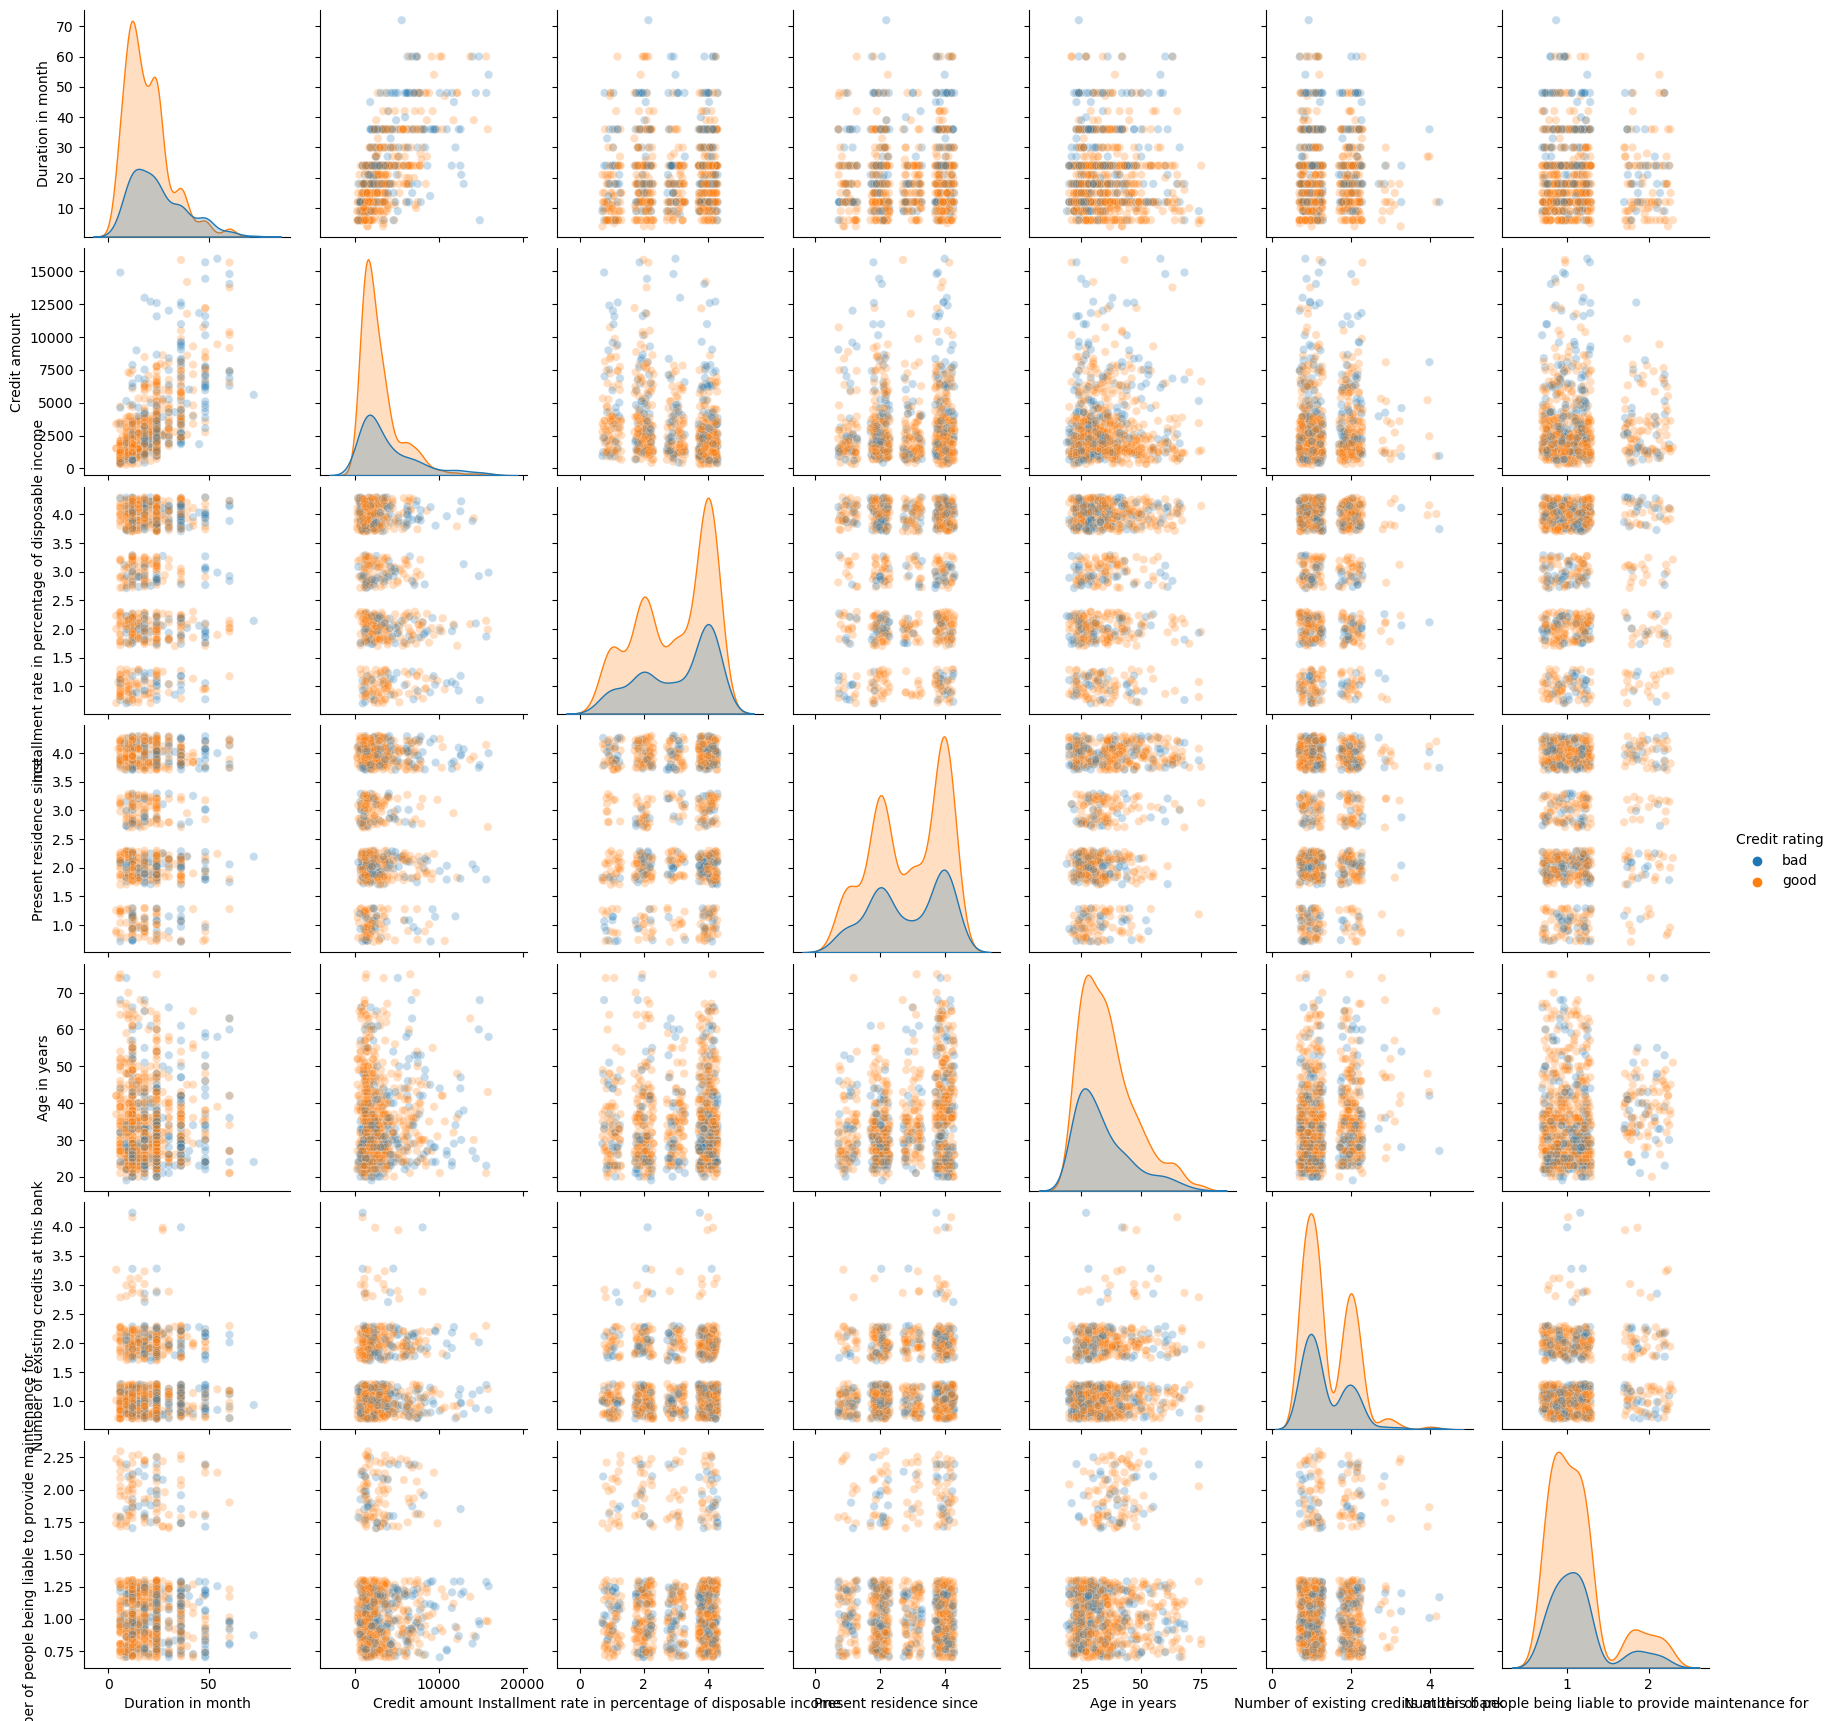

In [13]:
# Pairplotting the numerical columns
plot_set = train_set_values.copy()
discrete_attributes = ["Installment rate in percentage of disposable income",
                       "Present residence since",
                       "Number of existing credits at this bank",
                       "Number of people being liable to provide maintenance for"]

n_rows = plot_set.shape[0]

for attr in discrete_attributes:
    plot_set[attr] += np.random.uniform(-0.3, 0.3, size=(n_rows))

sns.pairplot(plot_set, markers='o', hue='Credit rating', plot_kws={'alpha' : 0.25})
plt.show()

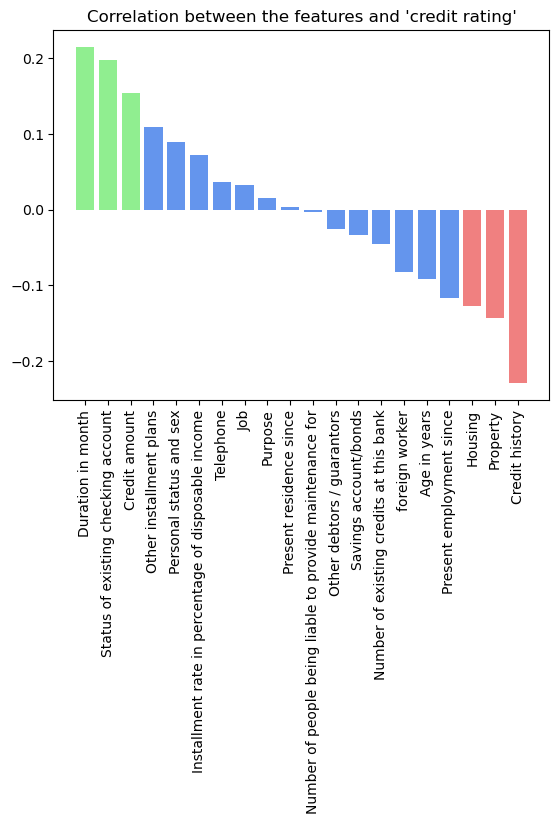

,Credit rating
Duration in month,0.214927
Status of existing checking account,0.197788
Credit amount,0.154739
Other installment plans,0.109844
Personal status and sex,0.089535
Installment rate in percentage of disposable income,0.072404
Telephone,0.036466
Job,0.032735
Purpose,0.015818
Present residence since,0.002967


In [14]:
corrs = data_encoded.corr()["Credit rating"].sort_values(ascending = False)
highlight_val = np.concatenate([corrs.head(3).values, corrs.tail(4).values], axis = 0)
colors = ['cornflowerblue' if i not in highlight_val else 'lightgreen' if i in highlight_val and i > 0 else 'lightcoral' for i in corrs[:-1]]

plt.bar(corrs.index[1:], corrs[1:], color = colors)

plt.title("Correlation between the features and 'credit rating'")

plt.xticks(rotation = 90)

plt.show()
pd.DataFrame(corrs[1:])

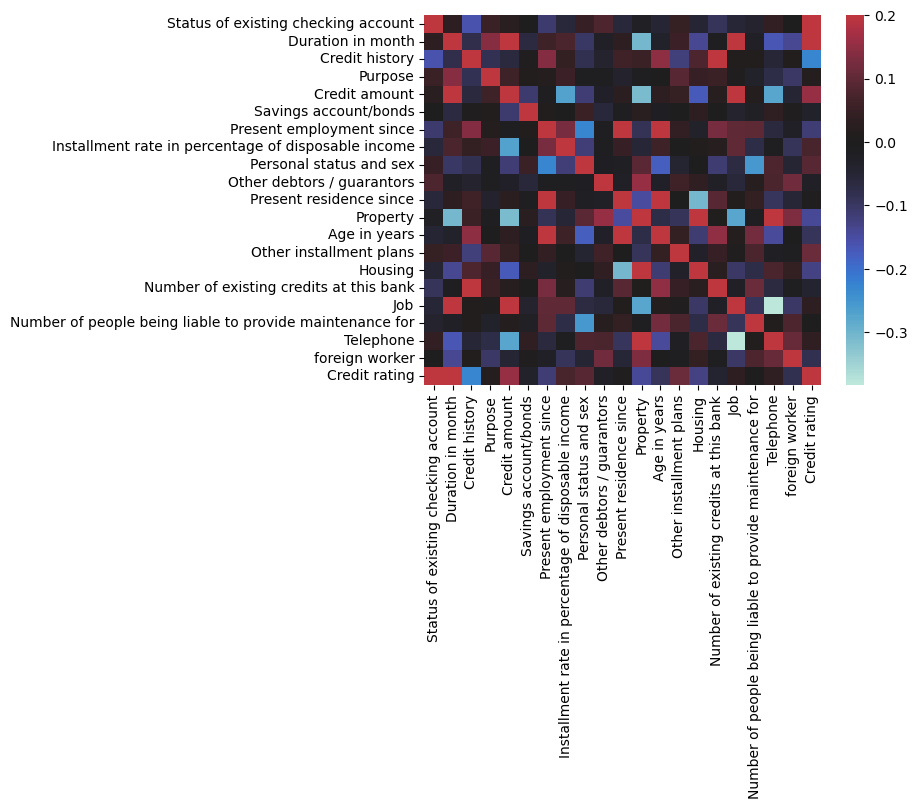

In [15]:
# Correlation between features and target value
corr = data_encoded.corr()
max = np.round(corr.iloc[:-1, -1].abs().sort_values(ascending = False).head(1)[0], 1)
ax = sns.heatmap(corr, vmax=max, center = 0)

**[Back to III.Explore the Data](#feature_overview)**<br>

### **3. Analysis of Features** <a id='anal_feat'></a> 

In [16]:
def plot_categorical(data_values, x, hue_order_hist):
    '''
    This function plots categorical data.

    Parameters:
    data_encoded : this is a pandas DataFrame which has encoded (ordinal) data in it
    x : is the variable we want to plot
    hue_order_hist : is a ordered list (in which the hue should be ordered)

    Returns:
    None, but prints the plots.
    '''
    temp_data_values = data_values.copy()
    temp_data_values[x] = pd.Categorical(temp_data_values[x], categories = hue_order_hist, ordered = True)
    
    fig, ax = plt.subplots(1,3, figsize = (15, 3))

    hist = sns.histplot(data=temp_data_values,
                        stat='percent',
                        common_norm=False,
                        shrink=0.7,
                        discrete=True,
                        ax = ax[0],
                        x=x,
                        multiple='dodge')
    hist.xaxis.set_ticks(temp_data_values[x].unique())
    hist.set_xticklabels(temp_data_values[x].unique(), rotation = 90)

    hist1 = sns.histplot(data=data_values,
                        hue=x,
                        hue_order = hue_order_hist,
                        stat='percent',
                        common_norm=False,
                        shrink=0.7,
                        discrete=True,
                        ax = ax[1],
                        x="Credit rating",
                        multiple='dodge')

    hist2 = sns.histplot(data=temp_data_values,
                        hue="Credit rating",
                        stat='percent',
                        common_norm=False,
                        shrink=0.7,
                        discrete=True,
                        ax = ax[2],
                        x=x,
                        multiple = 'fill')
    hist2.xaxis.set_ticks(temp_data_values[x].unique())
    hist2.set_xticklabels(temp_data_values[x].unique(), rotation = 90)

    sns.move_legend(hist1, 'lower center', bbox_to_anchor=(0.5, -0.8), borderaxespad=0)

    ax[0].title.set_text('Overall Distribution')
    ax[2].bar_label(ax[2].containers[0], label_type = 'center', fmt = '{:.0%}')
    ax[2].bar_label(ax[2].containers[1], label_type = 'center', fmt = '{:.0%}')
    ax[1].grid(axis = 'y')
    ax[1].title.set_text(f'Distribution of {x}')
    ax[2].grid(axis = 'y')
    ax[2].title.set_text('Normalized Share of\nGood and Bad Credit Ratings by Category')

    plt.show()

def plot_numerical_discrete(data_encoded, x,):
    '''
    This function plots numerical and discrete data.

    Parameters:
    data_encoded : this is a pandas DataFrame which has encoded (ordinal) data in it
    x : is the variable we want to plot

    Returns:
    None, but prints the plots.
    '''
    fig, ax = plt.subplots(1,3, figsize = (15,3), sharex = True, sharey = True)
    
    sns.histplot(data = data_encoded, 
                 x = x, kde = True, 
                 ax = ax[0], 
                 discrete= True,
                 shrink=0.7, 
                 stat = 'percent')

    sns.histplot(data = data_encoded[data_encoded['Credit rating'] == 0], 
                 x = x, 
                 ax = ax[1], 
                 discrete = True, 
                 stat = 'percent', 
                 shrink=0.7,
                 kde = True, 
                 color = 'slateblue')

    sns.histplot(data = data_encoded[data_encoded['Credit rating'] == 1], 
                 x = x, 
                 ax = ax[2], 
                 discrete = True, 
                 stat = 'percent', 
                 shrink=0.7,
                 kde = True, 
                 color = 'orange')

    ax[0].lines[0].set_color('crimson')
    ax[0].title.set_text('Overall Distribution')
    ax[1].lines[0].set_color('crimson')
    ax[1].title.set_text(f'Distribution of {x}\nfor Good Credit Ratings')
    ax[2].lines[0].set_color('crimson')
    ax[2].title.set_text(f'Distribution of {x}\nfor Bad Credit Ratings')
    ax[0].grid(axis = 'y')
    ax[1].grid(axis = 'y')
    ax[2].grid(axis = 'y')

    plt.show()

def plot_numerical_continous(data_encoded, x,):
    '''
    This function plots numerical and continious data.

    Parameters:
    data_encoded : this is a pandas DataFrame which has encoded (ordinal) data in it
    x : is the variable we want to plot

    Returns:
    None, but prints the plots.
    '''
    binwidth = np.round((np.max(data_encoded[x]) - np.min(data_encoded[x])) * ((len(data_encoded[x]) ** (1/3))) / (3.49 * np.std(data_encoded[x])))
    binwidth = int(binwidth)
    fig, ax = plt.subplots(1,3, figsize = (15,3), sharex = True, sharey = True)
    
    sns.histplot(data = data_encoded, x = x, 
                 kde = True, 
                 ax = ax[0], 
                 stat = 'percent', 
                 bins = binwidth)

    sns.histplot(data = data_encoded[data_encoded['Credit rating'] == 0], 
                 x = x, 
                 ax = ax[1], 
                 stat = 'percent', 
                 kde = True, 
                 color = 'slateblue', 
                 bins = binwidth)

    sns.histplot(data = data_encoded[data_encoded['Credit rating'] == 1], 
                 x = x, ax = ax[2], 
                 stat = 'percent', 
                 kde = True, 
                 color = 'orange', 
                 bins = binwidth)

    ax[0].lines[0].set_color('crimson')
    ax[0].title.set_text('Overall Distribution')
    ax[1].lines[0].set_color('crimson')
    ax[1].title.set_text(f'Distribution of {x}\nfor Good Credit Ratings')
    ax[2].lines[0].set_color('crimson')
    ax[2].title.set_text(f'Distribution of {x}\nfor Bad Credit Ratings')
    ax[0].grid(axis = 'y')
    ax[1].grid(axis = 'y')
    ax[2].grid(axis = 'y')

    plt.show()

**Duration in month**<br> <a id='duration'></a>
* Numerical / discrete <br>
* 0 % missing values<br>
* Seems usefull, as it has the highest correlation with the target variable of all features<br>
* Shorter durations are more likely to be rated as 'good'<br>
* The distribution seems to be positively skewed, a normal distribution is unlikely<br>
<br>
<u>Our thoughts about this feature:</u><br>
Could be insightful for determining a good or bad credit rating, as financial unstable customers would lend with shorter durations in comparsion to good credit ratings.<br>
Importance: (++)

**[Back to III.Explore the Data](#feature_overview)**<br>

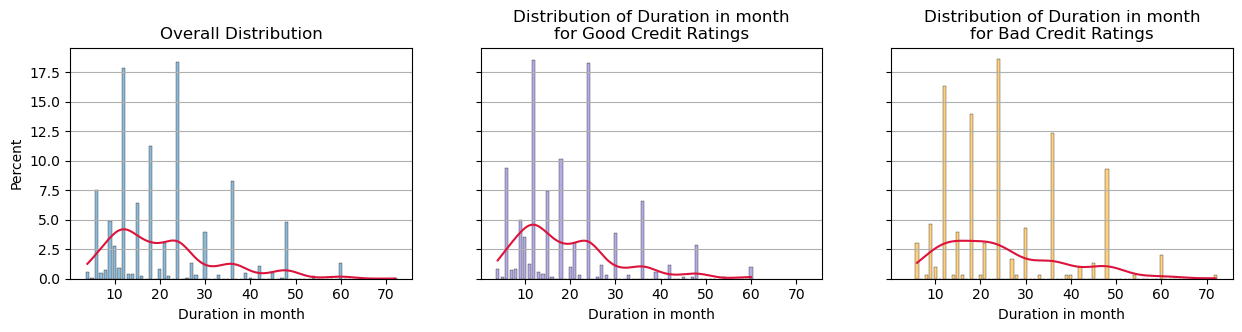

In [17]:
plot_numerical_discrete(data_encoded, 'Duration in month')

**Status of existing checking account**<br> <a id='status_ex_check'></a>
* categorical / ordinal<br>
* 0 % missing values<br>
* Noisiness and distribution are hard to interpret as it is a categorical value<br>
* Seems usefull, as it has the secound highest correlation with the target variable of all features<br>
* A rising pattern between the categories is recognized in regards to good credit rating
* A declining pattern between the categories is recognized in regards to bad credit rating
* Higher probability of getting a 'good' credit rating especially for 'no checking account'<br>
* The overall distribution seems positively skewed, a normal distribution is unlikely <br>
<br>
<u>Our thoughts about this feature:</u><br>
Could be usefull for determining credit rating, as we know the customer and the financial situation.<br>
Importance: (+++)

**[Back to III.Explore the Data](#feature_overview)**<br>

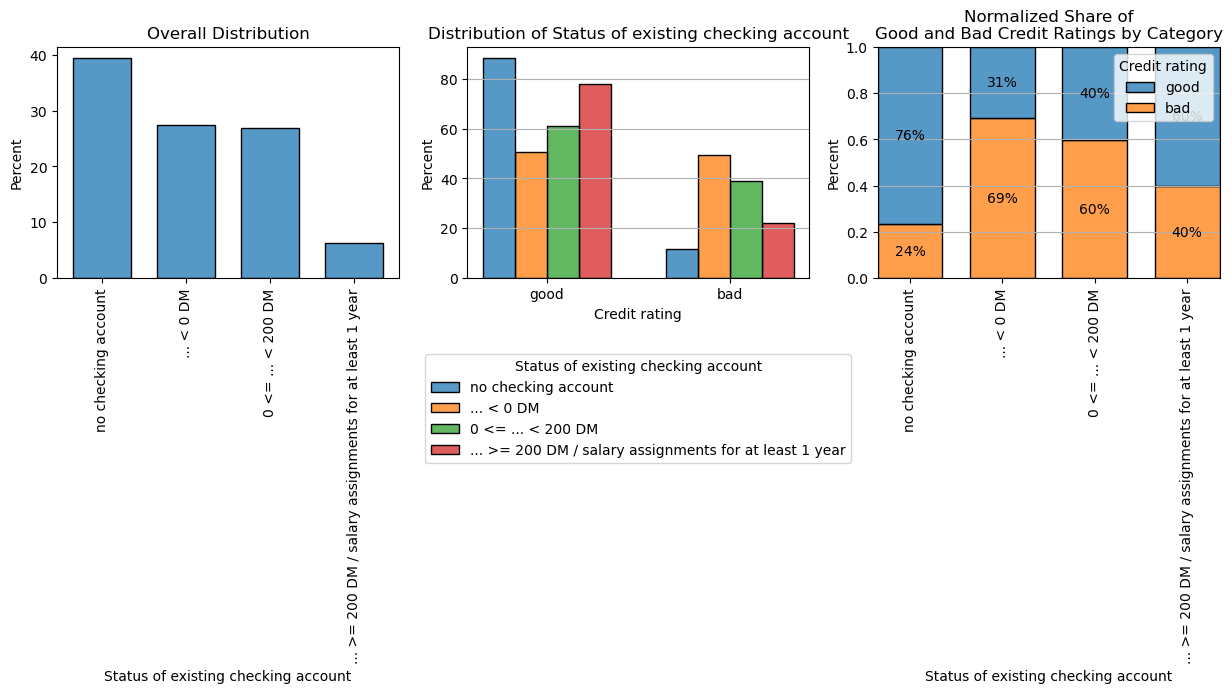

In [18]:
plot_categorical(data_values, 'Status of existing checking account', dict_ordinal_map['Status of existing checking account'])

**Credit amount**<br> <a id='creditamount'></a>
* numerical / continous <br>
* 0 % missing values<br>
* Seems usefull, as it has the third highest correlation with the target variable of all features<br>
* Smaller credit amounts are more likely to be rated as 'good'<br>
* The overall distribution seems positively skewed, a normal distribution is unlikely<br>
<br>
<u>Our thoughts about this feature:</u><br>
Could be usefull as smaller credit amounts have a higher probability to be determined as a good credit rating.<br>
Importance: (++)

**[Back to III.Explore the Data](#feature_overview)**<br>

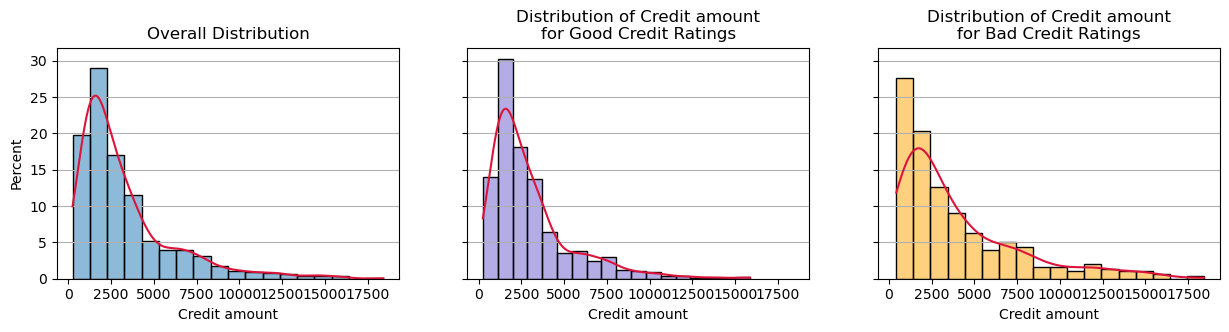

In [19]:
plot_numerical_continous(data_encoded, 'Credit amount')

**Other installment plans**<a id='other_install'></a>
* categorical / nominal
* 0 % missing values
* It is more likely to get a good credit rating, depending on the category other installment plans have a higher probability to be a bad credit rating
* Most borrower have no other installment plan
* The overall distribution seems positivily skewed, no evidence for normal distribution <br>
<br>
<u>Our thoughts about this feature:</u><br>
Could influence the credit rating as people have limited income and therefore must manage their finances to pay the installments. Especially seen in the normalized share plot.<br>
Importance: (++)

**[Back to III.Explore the Data](#feature_overview)**<br>

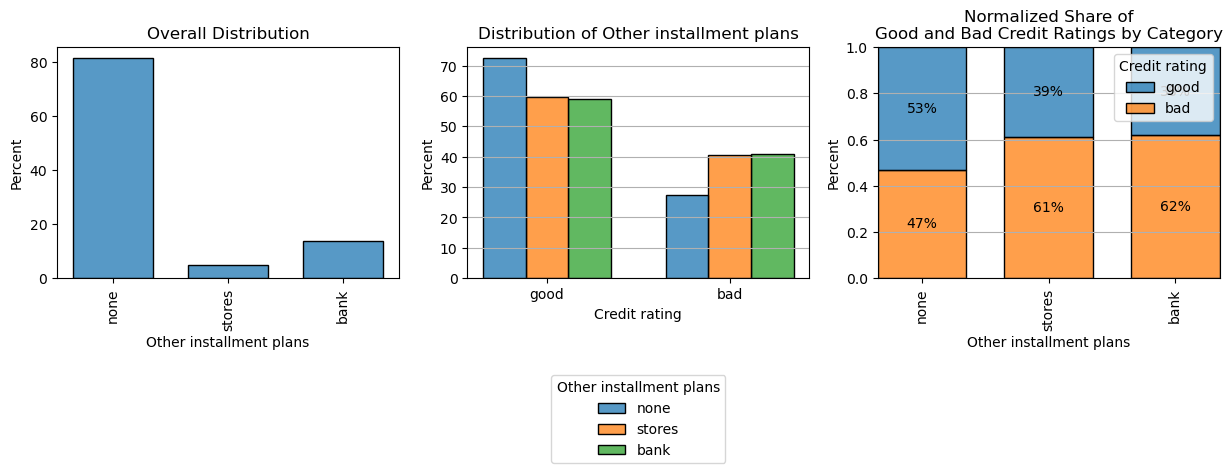

In [20]:
plot_categorical(data_values, 'Other installment plans', dict_ordinal_map['Other installment plans'])

**Personal status and sex**<a id='psasx'></a>
* categorical / nominal
* 0 % missing values
* Most borrowers are single males, divorced or seperated males have a high probability to get a bad credit rating
* It is more likely to get a good credit rating overall <br>
<br>
<u>Our thoughts about this feature:</u><br>
It could be important as a maried person has a houshold income to pay the installments. The gender should not be important.<br>
Importance: (+)

**[Back to III.Explore the Data](#feature_overview)**<br>

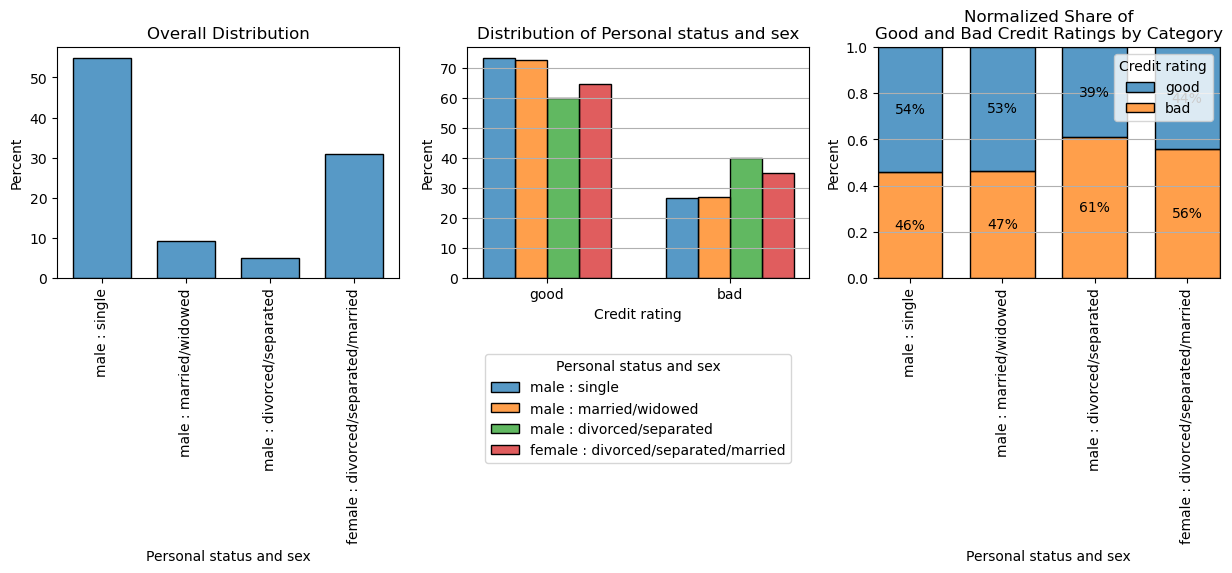

In [21]:
plot_categorical(data_values, 'Personal status and sex', dict_ordinal_map['Personal status and sex'])

**Telephone**<a id='tele'></a>
* categorical / binary
* 0 % missing values
* Most borrower don't have a telephone registered
* It is more likely to have a good credit rating
* Between the registered telephone customers and the not registered telephone customers is no difference for good or bad credit ratings<br>
<br>
<u>Our thoughts about this feature:</u><br>
Shouldn't be important if a customer has a telephone.<br>
Importance: (---)

**[Back to III.Explore the Data](#feature_overview)**<br>

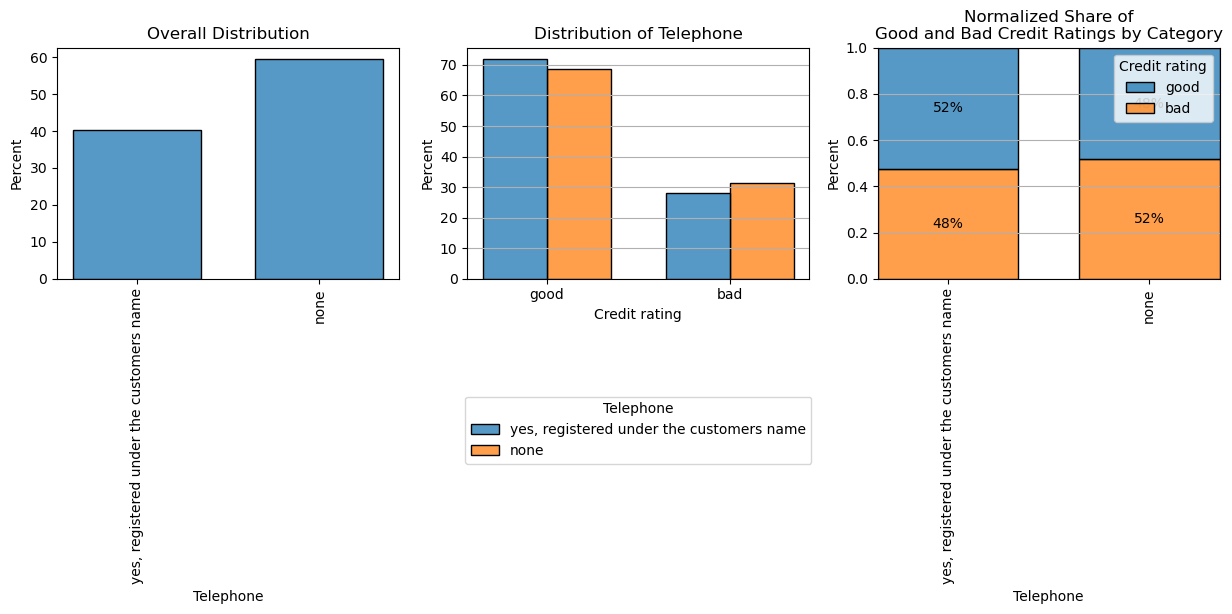

In [22]:
plot_categorical(data_values, 'Telephone', dict_ordinal_map['Telephone'])

**Installment rate in % of disposable income**<a id='install_inc'></a>
* numerical / discrete
* 0 % missing values
* Most customer have a 4 % installment rate plan
* There is no difference between good or bad credit ratings and categories
* The overall distribution seems negativily skewed, no evidence for normal distribution<br>
<br>
<u>Our thoughts about this feature:</u><br>
It could be important as this determines if the customer can pay our installments and how much it reserves their income for other expenses.<br>
Importance: (++)

**[Back to III.Explore the Data](#feature_overview)**<br>

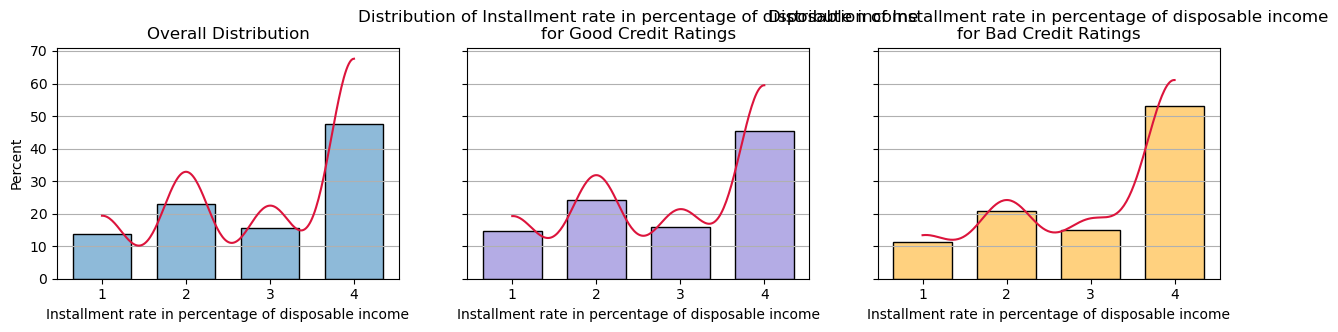

In [23]:
plot_numerical_discrete(data_encoded, 'Installment rate in percentage of disposable income')

**Job**<a id='job'></a>
* categorical / ordinal
* 0 % missing values
* Most borrower are skilled employees or officials
* It is more likely to get a good credit rating for all categories
* There is no difference in the likelihood to get a good or bad credit rating between the categories
* The overall distribution seems normally distributed<br>
<br>
<u>Our thoughts about this feature:</u><br>
Should be very important. Determines personal income and solvency.<br>
Importance: (+++)

**[Back to III.Explore the Data](#feature_overview)**<br>

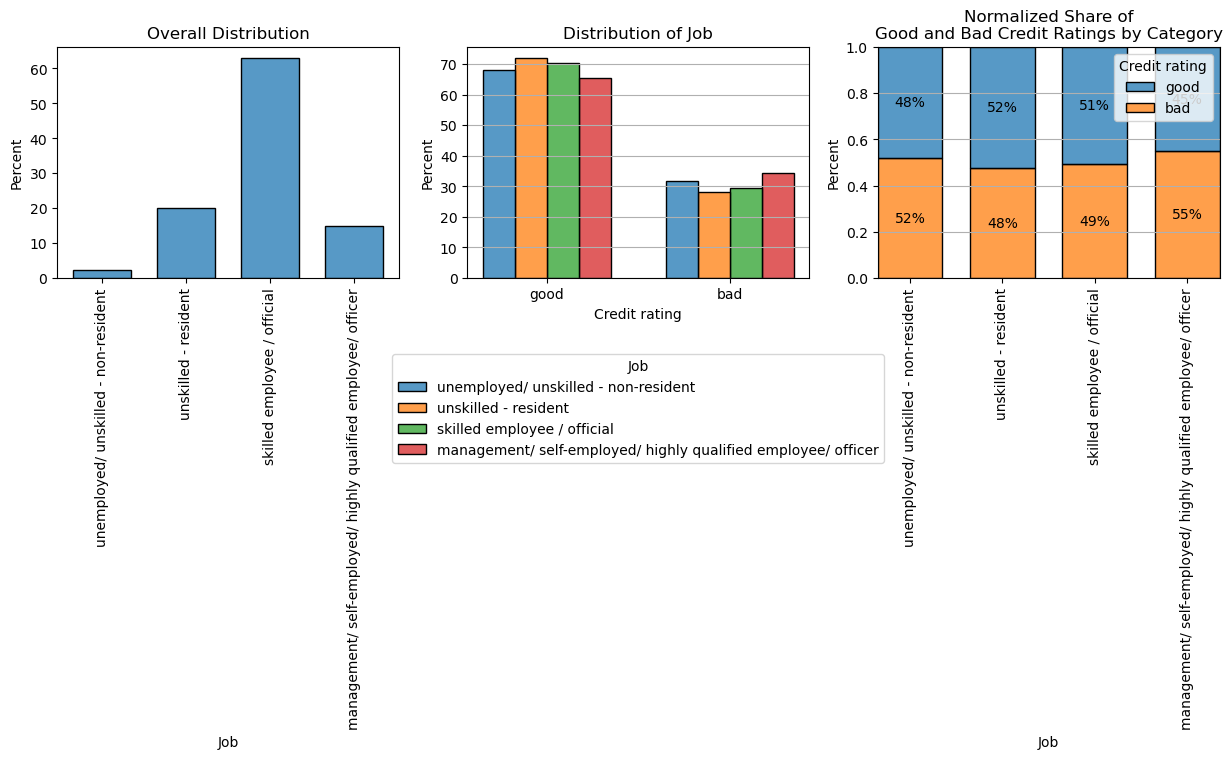

In [24]:
plot_categorical(data_values, 'Job', dict_ordinal_map['Job'])

**Present residence since**<a id='presres'></a>
* numerical / discrete
* 0 % missing values
* Most customer have a residence since 4 years
* There is no difference in likelihood between good or bad credit ratings and present residence
* The overall distribution seems negativily skewed, no evidence for normal distribution<br>
<br>
<u>Our thoughts about this feature:</u><br>
Should be not important for itself, could be important if combined with property feature. As customer can change their residence without conflicting their solvency, but if they have a new house etc. this will influence their possible spendings for the installment.<br>
Importance: (---/++)

**[Back to III.Explore the Data](#feature_overview)**<br>

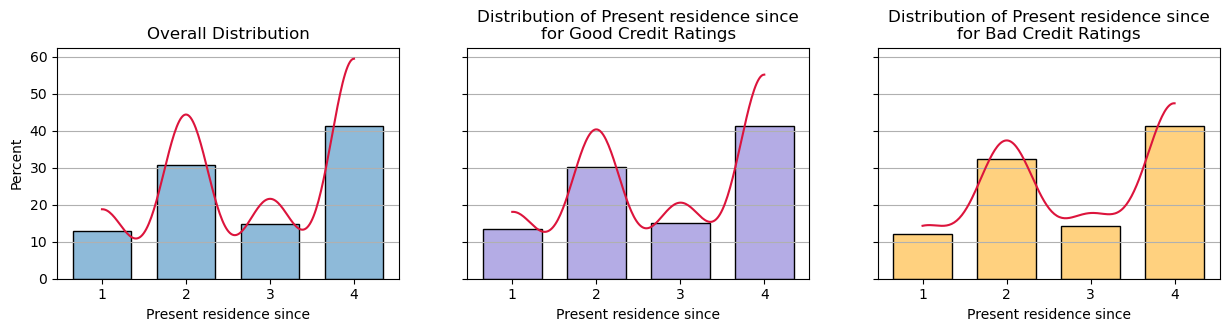

In [25]:
plot_numerical_discrete(data_encoded, 'Present residence since')

**Purpose**<a id='purpose'></a>
* categorical / nominal
* 0 % missing values
* Most customers buy a radio / television with the credit
* Overall categories it is more likely to get a good credit rating
* The likelihood for getting a bad credit rating is high for education, others and new cars
* The overall distribution seems positivily skewed, no evidence for normal distribution<br>
<br>
<u>Our thoughts about this feature:</u><br>
Could be usefull. It tells us about the data that the credits are mostly consum credits.<br>
Importance: (0)

**[Back to III.Explore the Data](#feature_overview)**<br>

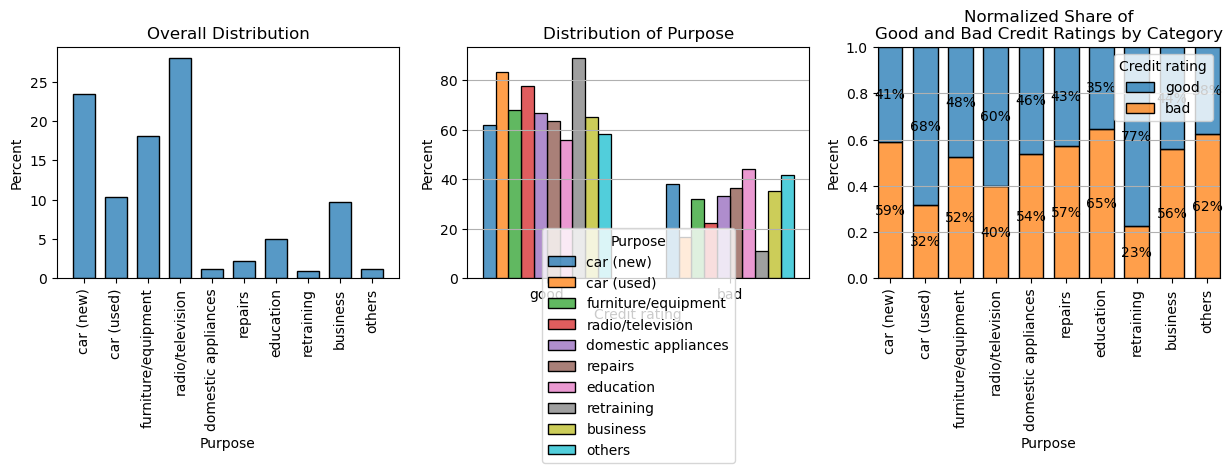

In [26]:
plot_categorical(data_values, 'Purpose', dict_ordinal_map['Purpose'])


**# of Peope being liable to provide maintenance for**<a id='liable'></a>
* numerical / discrete
* 0 % missing values
* Most customers have one person liable
* There is no difference in likelihood of getting a good or bad credit rating regarding the liable people<br>
<br>
<u>Our thoughts about this feature:</u><br>
Could be important as we have more people to pay the installments. Therefore higher solvency but also more trouble if customer can't pay.<br>
Importance: (++)

**[Back to III.Explore the Data](#feature_overview)**<br>

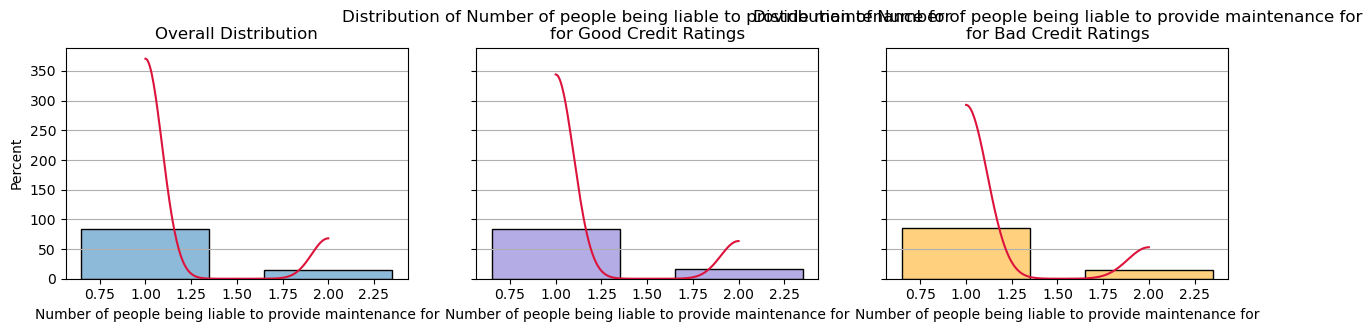

In [27]:
plot_numerical_discrete(data_encoded, 'Number of people being liable to provide maintenance for')

**Savings account/bonds**<br><a id='SavingsAccount'></a>
* categorical / ordinal <br>
* 0 % missing values<br>
* Most customers have < 100 DM on their savings accounts / bonds
* The highest likelihood of getting a bad credit rating is for the < 100 DM savings accounts / bonds> 
* High probability of getting a 'good' credit rating especially for categoryies '... >= 1000 DM' and 'unknown/ no savings account'<br>
* It is overall more likely to get a good credit rating
* The overall distribution seems positively skewed, no evidence for normal distribution<br>
<br>
<u>Our thoughts about this feature:</u><br>
Could give us more information about the financial situation of the customer, if he has savings.<br>
Importance: (+)

**[Back to III.Explore the Data](#feature_overview)**<br>

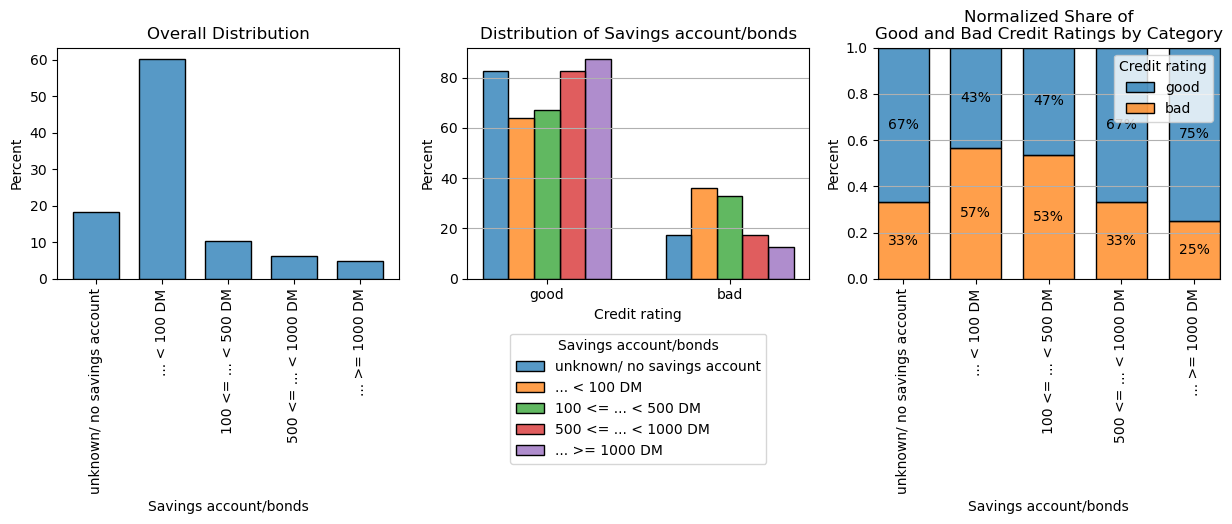

In [28]:
plot_categorical(data_values, 'Savings account/bonds', dict_ordinal_map['Savings account/bonds'])

**Other debtors / guarantors**<a id='debtors'></a>
* categorical / nominal
* 0 % missing values
* Most customers don't have another debtor / gurantor
* It is more likely to get a good credit rating overall
* If customer have co-applicant it seems they have a higher probability to get a bad credit rating
* The overall distribution looks positivily skewed, no evidence of a normal distribution<br>
<br>
<u>Our thoughts about this feature:</u><br>
This should influence the rating as solvent customers don't need other debtors / gurantors. On the other hand it could raise the credit rating because more people are responsible to pay the installment.<br>
Importance: (++)

**[Back to III.Explore the Data](#feature_overview)**<br>

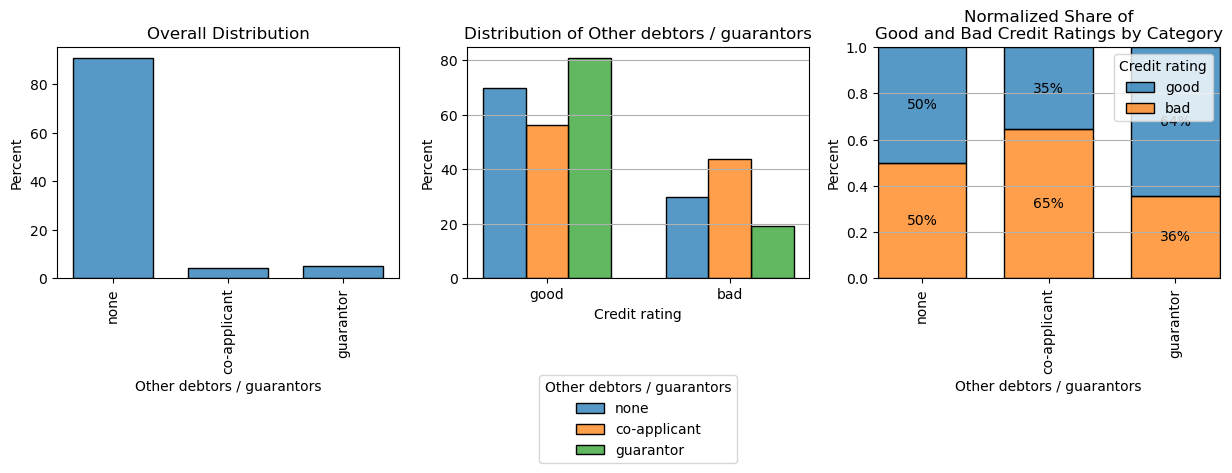

In [29]:
plot_categorical(data_values, 'Other debtors / guarantors', dict_ordinal_map['Other debtors / guarantors'])

**Number of existing credits at this bank**<a id='existcredit'></a>
* numerical / discrete
* 0 % missing values
* Most customers only have one credit at this bank
* There is no difference in likelihood for a good or bad credit rating regarding the number of credits at this bank
* The overall distributions seems positively skewed, no evidence for a normal distribution<br>
<br>
<u>Our thoughts about this feature:</u><br>
Should be important as this determines if we have history with this customer and if he is financially solvent and reliable to pay installments.<br>
Importance: (++)

**[Back to III.Explore the Data](#feature_overview)**<br>

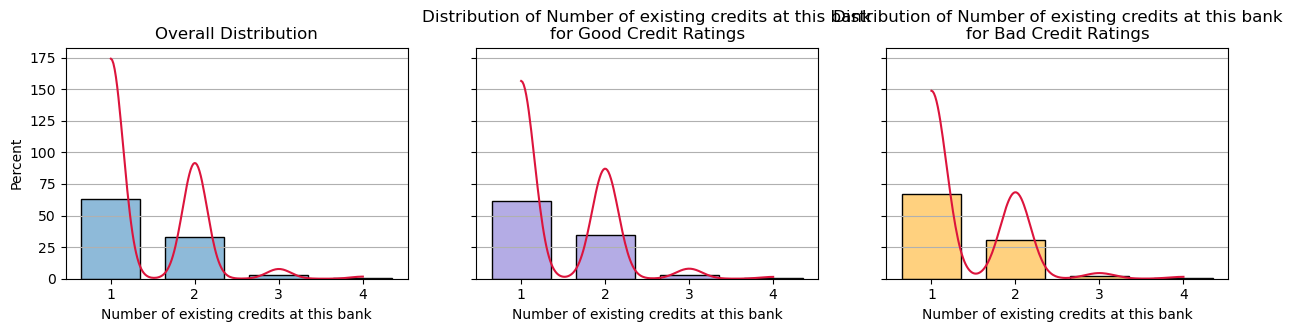

In [30]:
plot_numerical_discrete(data_encoded, 'Number of existing credits at this bank')

**Age in years**<a id='age'></a>
* numerical / discrete
* 0 % missing values
* Most customers are between 23 - 27 years old
* There is a higher probability to get a bad credit rating if a customer is young (between 21 - 30)
* The overall distribution seems positively skewed<br>
<br>
<u>Our thoughts about this feature:</u><br>
Young people have a different spending profile, not much savings and change a lot in their lifestyle. This could influence the credit rating. Old people could be more conservative and solid.<br>
Importance: (+)

**[Back to III.Explore the Data](#feature_overview)**<br>

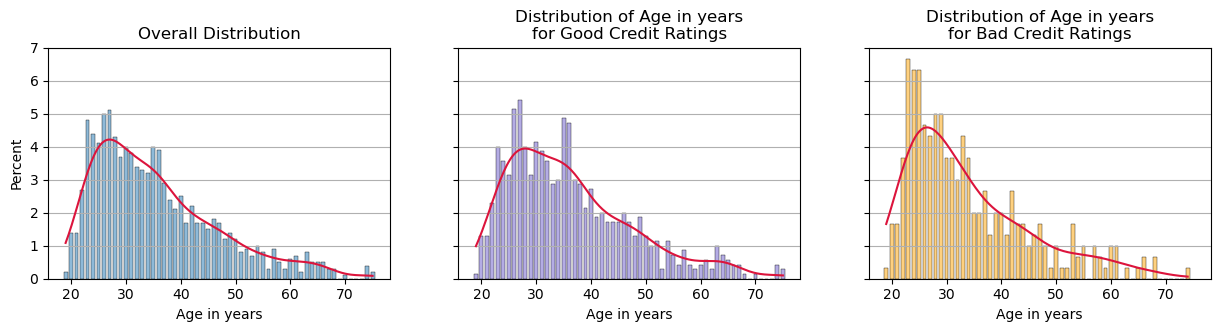

In [31]:
plot_numerical_discrete(data_encoded, 'Age in years')

**Foreign worker**<a id='fw'></a>
* categorical / binary
* 0 % missing values
* Most customers are foreign workers
* There is a higher probability to get a good credit rating overall. Nethertheless there seems to be a difference between foreign worker (but also the sample for not foreign workers is little)<br>
<br>
<u>Our thoughts about this feature:</u><br>
Should not determine if he is solvent or not. Also foreign worker can have high level jobs with good payment and therefore solvency.<br>
Importance: (--)

**[Back to III.Explore the Data](#feature_overview)**<br>

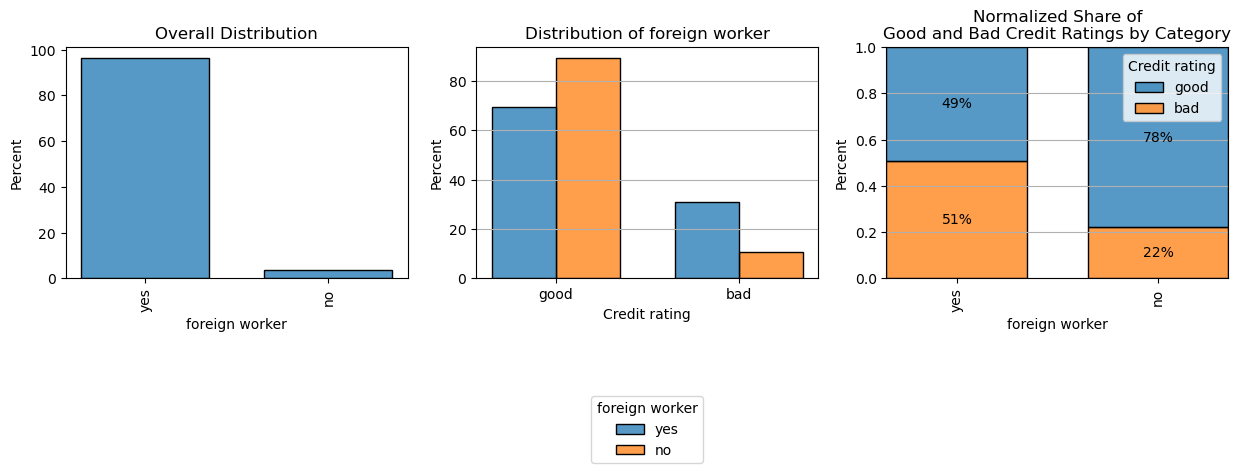

In [32]:
plot_categorical(data_values, 'foreign worker', dict_ordinal_map['foreign worker'])

**Present employment since**<a id='pes'></a>
* categorical / ordinal
* 0 % missing values
* Most customers are between 1 - 4 years employed
* There is a higher probability overall categories to get a good credit rating
* But there is a difference between the group of < 4 years employment and > 4 years to get a bad credit rating
* The overall distribution seems like a normal distribution (only the last category is slightly to much for a normal distribution)<br>
<br>
<u>Our thoughts about this feature:</u><br>
To pay our installment the customer should have a work. This could influence the credit rating if he doesn't work and puts us at risk if the credit could default.<br>
Importance: (++)

**[Back to III.Explore the Data](#feature_overview)**<br>

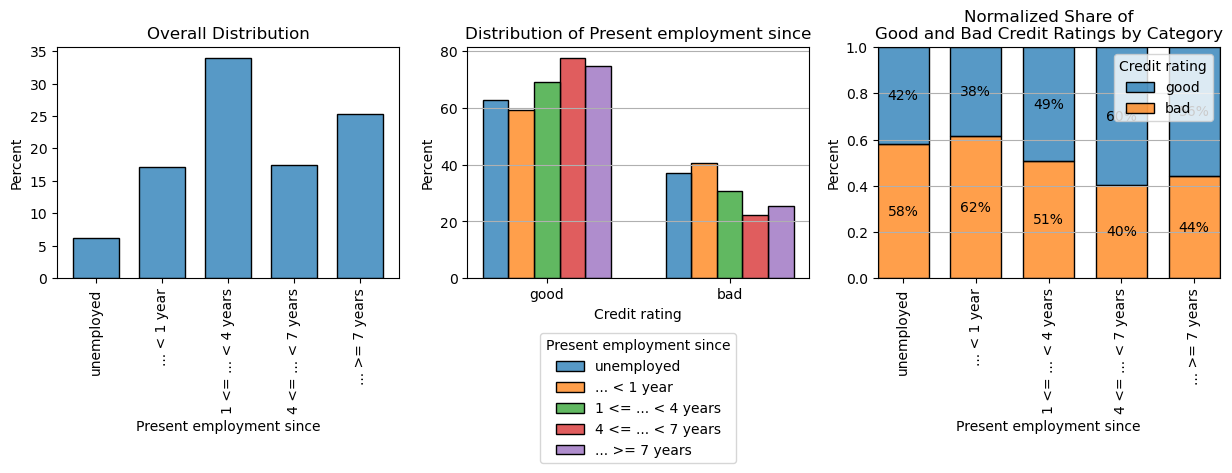

In [33]:
plot_categorical(data_values, 'Present employment since', dict_ordinal_map['Present employment since'])

**Property**<a id='prop'></a>
* categorical / nominal
* 0 % missing values
* It has the third highest negative correlation
* Most customers have a car or other as a proberty
* There is a higher likelihhod to get a bad credit rating if there is no or unknown property as the other categories
* The overall distribution doesn't follow a normal distribution<br>
<br>
<u>Our thoughts about this feature:</u><br>
The importance for itself is okayish, could be important combined with "present residence since" feature (see above).<br>
Importance: (+/++)

**[Back to III.Explore the Data](#feature_overview)**<br>

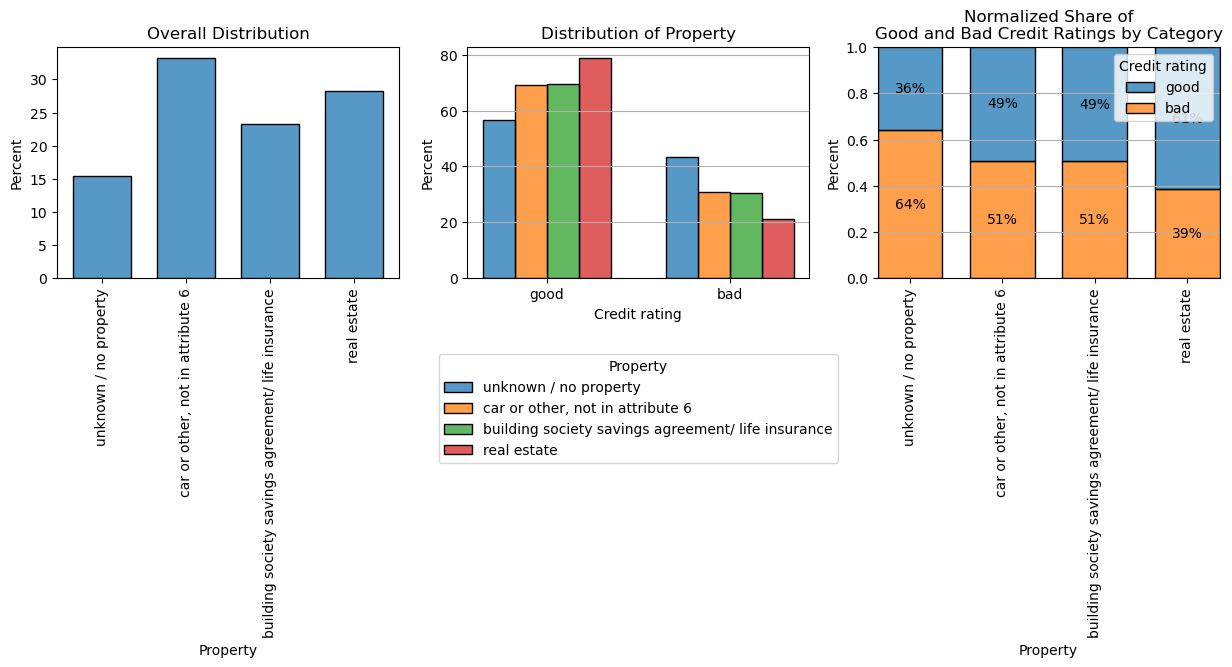

In [34]:
plot_categorical(data_values, 'Property', dict_ordinal_map['Property'])

**Housing**<a id='housing'></a>
* categorical / nominal
* 0 % missing values
* It has the secound highest negative correlation
* Most customers have a own house
* The customers with a own house have a lower probability to get a bad credit rating (for free and rent have similar probabilities to get a bad / good rating)
* The overall distribution seems negativily skewed, therefore no evidence for normal distribution<br>
<br>
<u>Our thoughts about this feature:</u><br>
For itself rather unimportant but combined with property and others could be important.<br>
Importance: (0/+)

**[Back to III.Explore the Data](#feature_overview)**<br>

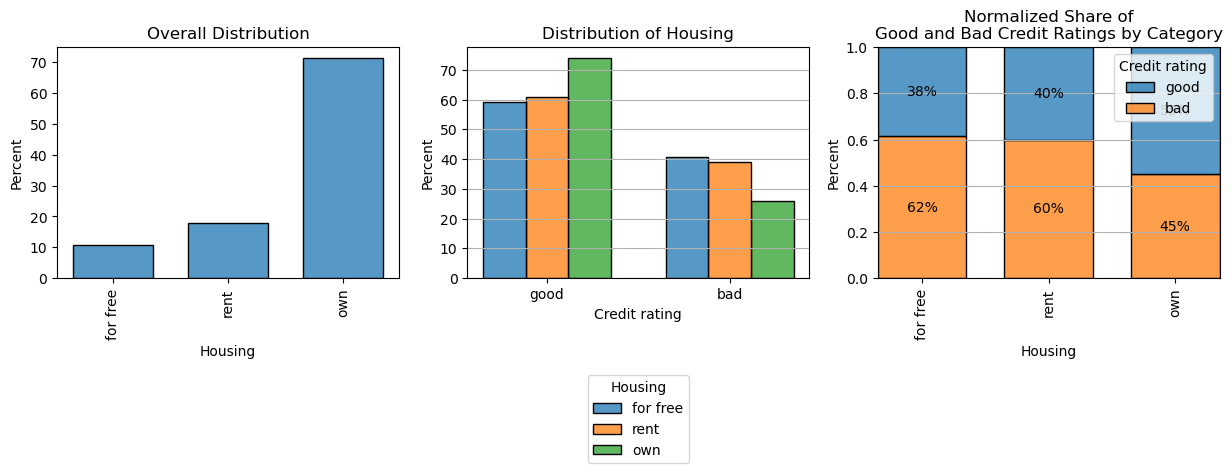

In [35]:
plot_categorical(data_values, 'Housing', dict_ordinal_map['Housing'])

**Credit history**<br><a id='cred_his'></a>
* categorical / nominal <br>
* 0 % missing values<br>
* It has the highest negative correlation
* High probability of getting a 'good' credit rating especially for 'critical account/ other credits existing (not at this bank)'<br>
* High probability of getting a 'bad' credit rating especially for 'no credits taken/ all credits paid back duly' and 'all credits at bank payed back dully'<br>
* The overall distribution looks negativily skewed<br>
<br>
<u>Our thoughts about this feature:</u><br>
Should be usefull and it is very important, as it tells us if existing credits are paid back duly or if it is a critical account.<br>
Importance: (+++)

**[Back to III.Explore the Data](#feature_overview)**<br>

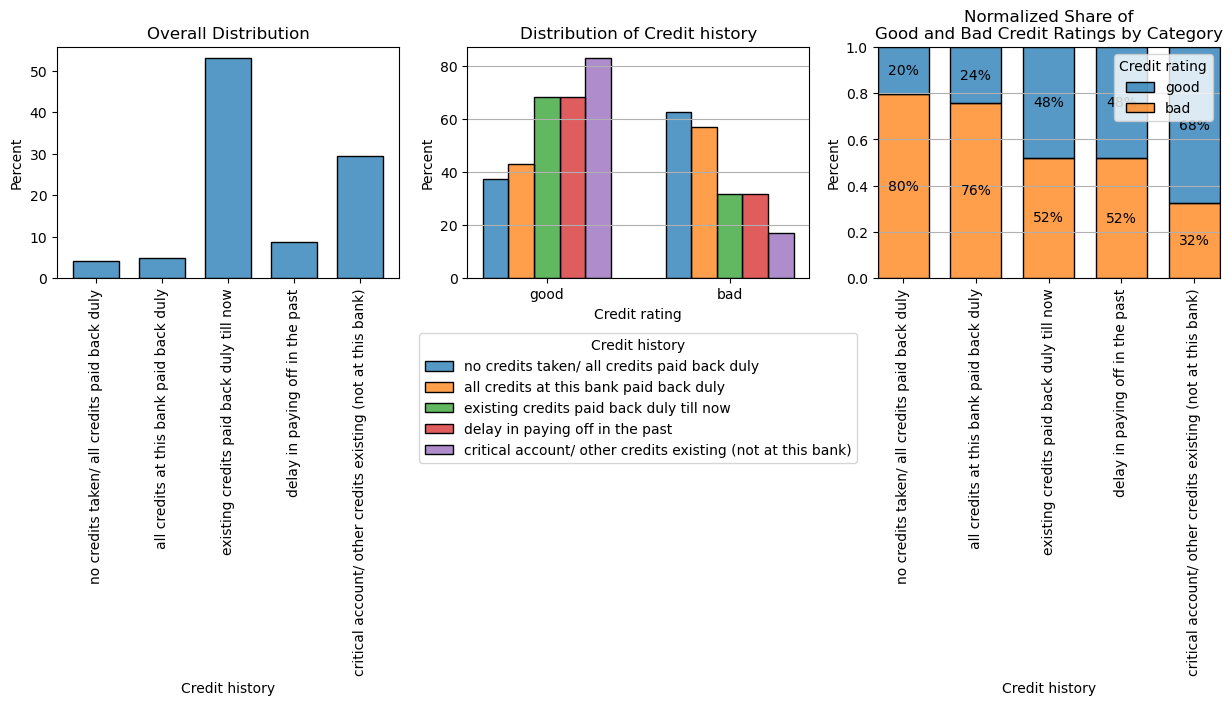

In [36]:
plot_categorical(data_values, 'Credit history', dict_ordinal_map['Credit history'])


Usefull data to transfer into the follwing notebooks

In [37]:
# Original dataset and dataset with real values
%store data
%store data_values

# Train/Test splits
%store train_set
%store test_set
%store train_set_values

# Feature and target variable splits
%store X_train
%store y_train
%store X_test
%store y_test

# Encoded dataset
%store data_encoded
%store data_dummies

# Dictionarys
%store cat_dict
%store dict_ordinal_map

# lists with features
%store attributes
%store num_attribs
%store cat_attribs
%store binary_attribs
%store onehot_attrbs

Stored 'data' (DataFrame)
Stored 'data_values' (DataFrame)
Stored 'train_set' (DataFrame)
Stored 'test_set' (DataFrame)
Stored 'train_set_values' (DataFrame)
Stored 'X_train' (ndarray)
Stored 'y_train' (ndarray)
Stored 'X_test' (ndarray)
Stored 'y_test' (ndarray)
Stored 'data_encoded' (DataFrame)
Stored 'data_dummies' (DataFrame)
Stored 'cat_dict' (dict)
Stored 'dict_ordinal_map' (dict)
Stored 'attributes' (list)
Stored 'num_attribs' (list)
Stored 'cat_attribs' (list)
Stored 'binary_attribs' (list)
Stored 'onehot_attrbs' (list)
